# Business Problem:
When new career question comes in, instead of matching new professional to answer this question, we search for historical question with high similarity in the existing database and then recommend corresponding answers. In other words, through the comparison of question similarity, previous answers are prompted to answer new question.

* The following NLP models are expected to compare question similarity:
  1. TF-IDF model with Cosine and K-Means similarity metrics
  2. DOC2VEC model with Cosine similarity metric
  3. LDA model with euclidean distances similarity metric


# Data Import

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/ML Final Project/data

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/ML Final Project/data


In [ ]:
answers = pd.read_csv('answers.csv')
answers.head()

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08 UTC+0000,<p>Hi. I joined the Army after I attended coll...
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02 UTC+0000,"<p>Dear Priyanka,</p><p>Greetings! I have answ..."
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47 UTC+0000,<p>I work for a global company who values high...
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33 UTC+0000,I agree with Denise. Every single job I've had...


In [ ]:
questions = pd.read_csv('questions.csv')
questions.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,To become a specialist in business management...,i hear business management is a hard way to ge...
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...


In [ ]:
professionals = pd.read_csv('professionals.csv')
professionals.head()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,NaN,2011-10-05 20:35:19 UTC+0000
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,NaN,2011-10-05 20:49:21 UTC+0000
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26 UTC+0000
3,977428d851b24183b223be0eb8619a8c,"Boston, Massachusetts",NaN,NaN,2011-11-09 20:39:29 UTC+0000
4,e2d57e5041a44f489288397c9904c2b2,NaN,NaN,NaN,2011-12-10 22:14:44 UTC+0000


In [ ]:
tag_questions = pd.read_csv('tag_questions.csv')
tag_questions.head()

,tag_questions_tag_id,tag_questions_question_id
0,28930,cb43ebee01364c68ac61d347a393ae39
1,28930,47f55e85ce944242a5a347ab85a8ffb4
2,28930,ccc30a033a0f4dfdb2eb987012f25792
3,28930,e30b274e48d741f7bf50eb5e7171a3c0
4,28930,3d22742052df4989b311b4195cbb0f1a


In [ ]:
tags = pd.read_csv('tags.csv')
tags.head()

,tags_tag_id,tags_tag_name
0,27490,college
1,461,computer-science
2,593,computer-software
3,27292,business
4,18217,doctor


In [ ]:
tag_users = pd.read_csv('tag_users.csv')
tag_users.head()

,tag_users_tag_id,tag_users_user_id
0,593,c72ab38e073246e88da7e9a4ec7a4472
1,1642,8db519781ec24f2e8bdc67c2ac53f614
2,638,042d2184ee3e4e548fc3589baaa69caf
3,11093,c660bd0dc1b34224be78a58aa5a84a63
4,21539,8ce1dca4e94240239e4385ed22ef43ce


In [ ]:
question_score = pd.read_csv('question_scores.csv')
question_score.head()

,id,score
0,38436aadef3d4b608ad089cf53ab0fe7,5
1,edb8c179c5d64c9cb812a59a32045f55,4
2,333464d7484b43e3866e86096bc4ddb9,6
3,4b995e60b99d4ee18346e893e007cb8f,6
4,f6b9ca94aed04ba28256492708e74f60,6


In [ ]:
students = pd.read_csv('students.csv')
students.head()

,students_id,students_location,students_date_joined
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24 UTC+0000
1,e37a5990fe354c60be5e87376b08d5e3,NaN,2011-12-27 03:02:44 UTC+0000
2,12b402cceeda43dcb6e12ef9f2d221ea,NaN,2012-01-01 05:00:00 UTC+0000
3,a0f431fc79794edcb104f68ce55ab897,NaN,2012-01-01 05:00:00 UTC+0000
4,23aea4702d804bd88d1e9fb28074a1b4,NaN,2012-01-01 05:00:00 UTC+0000


In [ ]:
answer_scores = pd.read_csv('answer_scores.csv')
answer_scores.head()

,id,score
0,7b2bb0fc0d384e298cffa6afde9cf6ab,1
1,7640a6e5d5224c8681cc58de860858f4,5
2,3ce32e236fa9435183b2180fb213375c,2
3,fa30fe4c016043e382c441a7ef743bfb,0
4,71229eb293314c8a9e545057ecc32c93,2


  # Merge Files to train questions
    * Merge questions and score
    * Merge questions and aggregated tags
    * Merge student and tags
    * Merge questions and tagged student

In [ ]:
new_questions = questions.merge(question_score, how = 'left', left_on='questions_id', right_on= 'id')
new_questions = new_questions.drop(columns= ['id'])
new_questions = new_questions.rename(columns={"score": "question_score"})
new_questions.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,question_score
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...,1.0
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,5.0
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,2.0
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,To become a specialist in business management...,i hear business management is a hard way to ge...,2.0
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...,2.0


In [ ]:
new_tag_questions = tag_questions.merge(tags, how = 'outer', left_on= 'tag_questions_tag_id', right_on= 'tags_tag_id')
tag_questions_grouped = new_tag_questions.groupby('tag_questions_question_id', as_index=False)[['tags_tag_name']].agg(lambda x: ' '.join(set(x)))
tag_questions_grouped.head()

,tag_questions_question_id,tags_tag_name
0,0003e7bf48f24b5c985f8fce96e611f3,time high-school technology majoring informati...
1,0006609dd4da40dcaa5a83e0499aba14,law psychology
2,000af224bc2f4e94a19f8b62ba279cc4,biology marine
3,000b30fb534b41f7b716fa9ebf9c3f35,exercise exercise-science teaching school
4,0018752e44b44e26bb74a0a43232b4d6,math puremathematics


In [ ]:
new_questions = new_questions.merge(tag_questions_grouped, how = 'left', left_on='questions_id', right_on= 'tag_questions_question_id')
new_questions = new_questions.drop(columns= ['tag_questions_question_id'])
new_questions.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,question_score,tags_tag_name
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...,1.0,lecture college professor
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,5.0,military army
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,2.0,working-abroad overseas
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,To become a specialist in business management...,i hear business management is a hard way to ge...,2.0,networking business
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...,2.0,college highschoolsenior firstgeneration schol...


In [ ]:
new_tag_users = tag_users.merge(tags,how='left', left_on='tag_users_tag_id', right_on= 'tags_tag_id')
new_tag_users = new_tag_users.drop(columns = ['tags_tag_id'])
new_tag_users = new_tag_users.groupby('tag_users_user_id', as_index=False)[['tags_tag_name']].agg(lambda x: ' '.join(set(x)))
new_tag_users.head()

,tag_users_user_id,tags_tag_name
0,00009a0f9bda43eba47104e9ac62aff5,digital-media content-creation script-writing
1,000196ef8db54b9a86ae70ad31745d04,accounting
2,0008138be908438e8944b21f7f57f2c1,real-estate
3,000d4635e5da41e3bfd83677ee11dda4,college information-technology university
4,000e2b5714444d79a672bf927905135c,financial-services


In [ ]:
new_students = students.merge(new_tag_users, how='left', left_on='students_id', right_on= 'tag_users_user_id')
new_students = new_students.drop(columns=['students_location','tag_users_user_id'])
new_students.head()

,students_id,students_date_joined,tags_tag_name
0,12a89e96755a4dba83ff03e03043d9c0,2011-12-16 14:19:24 UTC+0000,NaN
1,e37a5990fe354c60be5e87376b08d5e3,2011-12-27 03:02:44 UTC+0000,NaN
2,12b402cceeda43dcb6e12ef9f2d221ea,2012-01-01 05:00:00 UTC+0000,NaN
3,a0f431fc79794edcb104f68ce55ab897,2012-01-01 05:00:00 UTC+0000,NaN
4,23aea4702d804bd88d1e9fb28074a1b4,2012-01-01 05:00:00 UTC+0000,NaN


In [ ]:
new_questions =  new_questions.rename(columns={'tags_tag_name': 'question_tag_name'})
new_students = new_students.rename(columns={'tags_tag_name': 'students_tag_name'})
new_questions = new_questions.merge(new_students, how = 'left', left_on='questions_author_id', right_on= 'students_id')
new_questions = new_questions.drop(columns= ['questions_author_id', 'students_date_joined'])
new_questions.head()

,questions_id,questions_date_added,questions_title,questions_body,question_score,question_tag_name,students_id,students_tag_name
0,332a511f1569444485cf7a7a556a5e54,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...,1.0,lecture college professor,8f6f374ffd834d258ab69d376dd998f5,NaN
1,eb80205482e4424cad8f16bc25aa2d9c,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,5.0,military army,acccbda28edd4362ab03fb8b6fd2d67b,educator professional army-officer
2,4ec31632938a40b98909416bdd0decff,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,2.0,working-abroad overseas,f2c179a563024ccc927399ce529094b5,winterbreak professors asap online-gaming art ...
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-09-01 14:05:32 UTC+0000,To become a specialist in business management...,i hear business management is a hard way to ge...,2.0,networking business,2c30ffba444e40eabb4583b55233a5a4,NaN
4,5af8880460c141dbb02971a1a8369529,2017-09-01 02:36:54 UTC+0000,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...,2.0,college highschoolsenior firstgeneration schol...,aa9eb1a2ab184ebbb00dc01ab663428a,NaN


In [ ]:
new_questions['questions_date_added_year'] = pd.to_datetime(new_questions['questions_date_added']).dt.year
new_questions['questions_date_added_month'] = pd.to_datetime(new_questions['questions_date_added']).dt.month
new_questions['questions_date_added_day'] = pd.to_datetime(new_questions['questions_date_added']).dt.day
new_questions = new_questions.drop(columns=['questions_date_added'])

## Aggregated dataframe
* answer data cleaning
* merge answer and scores
* merge answers and tags
* professional data cleaning
* merge professionals with tags
* merge answers and professionals

In [ ]:
# Text cleaning
from bs4 import BeautifulSoup
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
nltk.download('stopwords')
nltk.download('wordnet')
snowball_stemmer = SnowballStemmer('english')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def html_parser(text):
    soup = BeautifulSoup(text, features="html.parser")
    text = soup.get_text()
    return text

In [ ]:
def text_cleaning(text):
    lines = (line.strip() for line in text.splitlines())
    lines = [re.sub('[^\w]', ' ', line) for line in lines]
    lines = [re.sub('[0-9]', '', line) for line in lines]
    chunks = [phrase.strip().lower() for line in lines for phrase in line.split(" ")]
    chunks = [snowball_stemmer.stem(token) for token in chunks if token not in stop_words and len(token) != 0]
    return ' '.join(chunks)

In [ ]:
new_answers = answers.copy()
new_answers['answer_body'] = [html_parser(i) for i in new_answers['answers_body'].fillna(' ')]
new_answers.head()

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body,answer_body
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...,Hi!\nYou are asking a very interesting questio...
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08 UTC+0000,<p>Hi. I joined the Army after I attended coll...,Hi. I joined the Army after I attended college...
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02 UTC+0000,"<p>Dear Priyanka,</p><p>Greetings! I have answ...","Dear Priyanka,Greetings! I have answered this ..."
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47 UTC+0000,<p>I work for a global company who values high...,I work for a global company who values highly ...
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33 UTC+0000,I agree with Denise. Every single job I've had...,I agree with Denise. Every single job I've had...


In [ ]:
new_answers['answers_date_added_year'] = pd.to_datetime(new_answers['answers_date_added']).dt.year
new_answers['answers_date_added_month'] = pd.to_datetime(new_answers['answers_date_added']).dt.month
new_answers['answers_date_added_day'] = pd.to_datetime(new_answers['answers_date_added']).dt.day

In [ ]:
new_answers = new_answers.merge(answer_scores, how = 'left', left_on= 'answers_id', right_on= 'id')
new_answers = new_answers.drop(columns = ['id','answers_body','answers_date_added'])
new_answers = new_answers.rename(columns={'score': 'answer_score'})
new_answers.head()

,answers_id,answers_author_id,answers_question_id,answer_body,answers_date_added_year,answers_date_added_month,answers_date_added_day,answer_score
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,Hi!\nYou are asking a very interesting questio...,2016,4,29,0.0
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,Hi. I joined the Army after I attended college...,2018,5,1,0.0
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,"Dear Priyanka,Greetings! I have answered this ...",2018,5,2,0.0
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,I work for a global company who values highly ...,2017,5,10,0.0
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,I agree with Denise. Every single job I've had...,2017,10,13,0.0


In [ ]:
new_professionals = professionals.merge(new_tag_users, how='left', left_on='professionals_id', right_on='tag_users_user_id')
new_professionals = new_professionals.drop(columns = ['professionals_location', 'tag_users_user_id'])
new_professionals = new_professionals.rename(columns= {'tags_tag_name':'professional_tag_name'})
new_professionals.head()

,professionals_id,professionals_industry,professionals_headline,professionals_date_joined,professional_tag_name
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,2011-10-05 20:35:19 UTC+0000,NaN
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,2011-10-05 20:49:21 UTC+0000,NaN
2,0c673e046d824ec0ad0ebe012a0673e4,NaN,NaN,2011-10-18 17:31:26 UTC+0000,air-force google career-choice education consu...
3,977428d851b24183b223be0eb8619a8c,NaN,NaN,2011-11-09 20:39:29 UTC+0000,NaN
4,e2d57e5041a44f489288397c9904c2b2,NaN,NaN,2011-12-10 22:14:44 UTC+0000,NaN


In [ ]:
new_professionals['professionals_date_joined_year'] = pd.to_datetime(new_professionals['professionals_date_joined']).dt.year
new_professionals['professionals_date_joined_month'] = pd.to_datetime(new_professionals['professionals_date_joined']).dt.month
new_professionals['professionals_date_joined_day'] = pd.to_datetime(new_professionals['professionals_date_joined']).dt.day
new_professionals = new_professionals.drop(columns = ['professionals_date_joined'])

In [ ]:
new_professionals['professionals_industry'] = [text_cleaning(i) for i in new_professionals['professionals_industry'].fillna(' ')]
new_professionals['professionals_headline'] = [text_cleaning(i) for i in new_professionals['professionals_headline'].fillna(' ')]
new_professionals.head()

,professionals_id,professionals_industry,professionals_headline,professional_tag_name,professionals_date_joined_year,professionals_date_joined_month,professionals_date_joined_day
0,9ced4ce7519049c0944147afb75a8ce3,,,NaN,2011,10,5
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,,,NaN,2011,10,5
2,0c673e046d824ec0ad0ebe012a0673e4,,,air-force google career-choice education consu...,2011,10,18
3,977428d851b24183b223be0eb8619a8c,,,NaN,2011,11,9
4,e2d57e5041a44f489288397c9904c2b2,,,NaN,2011,12,10


In [ ]:
new_answers = new_answers.merge(new_professionals, how='left', left_on='answers_author_id', right_on= 'professionals_id')
new_answers = new_answers.drop(columns=['answers_author_id'])
new_answers.head()

,answers_id,answers_question_id,answer_body,answers_date_added_year,answers_date_added_month,answers_date_added_day,answer_score,professionals_id,professionals_industry,professionals_headline,professional_tag_name,professionals_date_joined_year,professionals_date_joined_month,professionals_date_joined_day
0,4e5f01128cae4f6d8fd697cec5dca60c,332a511f1569444485cf7a7a556a5e54,Hi!\nYou are asking a very interesting questio...,2016,4,29,0.0,36ff3b3666df400f956f8335cf53e09e,mental health care,assist recogn develop potenti,salary career-choice engineering entrepreneur ...,2015.0,10.0,19.0
1,ada720538c014e9b8a6dceed09385ee3,eb80205482e4424cad8f16bc25aa2d9c,Hi. I joined the Army after I attended college...,2018,5,1,0.0,2aa47af241bf42a4b874c453f0381bd4,telecommun,senior investig,telecommunications internal-investigations,2018.0,3.0,23.0
2,eaa66ef919bc408ab5296237440e323f,eb80205482e4424cad8f16bc25aa2d9c,"Dear Priyanka,Greetings! I have answered this ...",2018,5,2,0.0,cbd8f30613a849bf918aed5c010340be,telecommun,life coach mentor author,change-management spirituality academic-adviso...,2017.0,11.0,11.0
3,1a6b3749d391486c9e371fbd1e605014,4ec31632938a40b98909416bdd0decff,I work for a global company who values highly ...,2017,5,10,0.0,7e72a630c303442ba92ff00e8ea451df,insur,global head travel account manag,insurance management travel business-travel man,2017.0,5.0,9.0
4,5229c514000446d582050f89ebd4e184,2f6a9a99d9b24e5baa50d40d0ba50a75,I agree with Denise. Every single job I've had...,2017,10,13,0.0,17802d94699140b0a0d2995f30c034c6,comput softwar,client success manag concur,interviews business marketing sales project-ma...,2017.0,10.0,13.0


In [ ]:
whole_df = new_questions.merge(new_answers, how='left', left_on= 'questions_id', right_on = 'answers_question_id')
whole_df = whole_df.drop(columns = ['answers_question_id'])
whole_df.head()

,questions_id,questions_title,questions_body,question_score,question_tag_name,students_id,students_tag_name,questions_date_added_year,questions_date_added_month,questions_date_added_day,answers_id,answer_body,answers_date_added_year,answers_date_added_month,answers_date_added_day,answer_score,professionals_id,professionals_industry,professionals_headline,professional_tag_name,professionals_date_joined_year,professionals_date_joined_month,professionals_date_joined_day
0,332a511f1569444485cf7a7a556a5e54,Teacher career question,What is a maths teacher? what is a ma...,1.0,lecture college professor,8f6f374ffd834d258ab69d376dd998f5,NaN,2016,4,26,4e5f01128cae4f6d8fd697cec5dca60c,Hi!\nYou are asking a very interesting questio...,2016.0,4.0,29.0,0.0,36ff3b3666df400f956f8335cf53e09e,mental health care,assist recogn develop potenti,salary career-choice engineering entrepreneur ...,2015.0,10.0,19.0
1,eb80205482e4424cad8f16bc25aa2d9c,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,5.0,military army,acccbda28edd4362ab03fb8b6fd2d67b,educator professional army-officer,2016,5,20,ada720538c014e9b8a6dceed09385ee3,Hi. I joined the Army after I attended college...,2018.0,5.0,1.0,0.0,2aa47af241bf42a4b874c453f0381bd4,telecommun,senior investig,telecommunications internal-investigations,2018.0,3.0,23.0
2,eb80205482e4424cad8f16bc25aa2d9c,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,5.0,military army,acccbda28edd4362ab03fb8b6fd2d67b,educator professional army-officer,2016,5,20,eaa66ef919bc408ab5296237440e323f,"Dear Priyanka,Greetings! I have answered this ...",2018.0,5.0,2.0,0.0,cbd8f30613a849bf918aed5c010340be,telecommun,life coach mentor author,change-management spirituality academic-adviso...,2017.0,11.0,11.0
3,4ec31632938a40b98909416bdd0decff,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,2.0,working-abroad overseas,f2c179a563024ccc927399ce529094b5,winterbreak professors asap online-gaming art ...,2017,2,8,1a6b3749d391486c9e371fbd1e605014,I work for a global company who values highly ...,2017.0,5.0,10.0,0.0,7e72a630c303442ba92ff00e8ea451df,insur,global head travel account manag,insurance management travel business-travel man,2017.0,5.0,9.0
4,2f6a9a99d9b24e5baa50d40d0ba50a75,To become a specialist in business management...,i hear business management is a hard way to ge...,2.0,networking business,2c30ffba444e40eabb4583b55233a5a4,NaN,2017,9,1,5229c514000446d582050f89ebd4e184,I agree with Denise. Every single job I've had...,2017.0,10.0,13.0,0.0,17802d94699140b0a0d2995f30c034c6,comput softwar,client success manag concur,interviews business marketing sales project-ma...,2017.0,10.0,13.0


In [ ]:
# remove questions with no answers
whole_df = whole_df[whole_df['answers_id'].notnull()]
whole_df = whole_df.reset_index()

In [ ]:
ques = whole_df.copy()
columns = ['questions_title','questions_body', 'question_tag_name', 'students_tag_name']
for col in columns:
    ques[col] = ques[col].fillna('')
    for i in range(len(ques[col])):
        ques[col][i] = text_cleaning(ques[col][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Use different NLP models to train question features

In [ ]:
import itertools

#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.utils import shuffle

# LDA
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import ClippedCorpus

# Visualization
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# training model
from sklearn.model_selection import train_test_split

#clustering
from sklearn.cluster import MiniBatchKMeans

In [ ]:
ques_related_feature = ques['questions_title'] + ' ' + ques['questions_body'] + ' ' + ques['question_tag_name'] + ' ' + ques['students_tag_name']

### A test example for all recommenders

In [ ]:
new_document = ques.loc[:, columns].sample(1).iloc[0]
new_doc_ws = new_document['questions_title']+ ' ' + new_document['questions_body'] + ' ' + new_document['question_tag_name'] + ' '+ new_document['students_tag_name']
new_doc = new_document['questions_title'] + new_document['questions_body'] + new_document['question_tag_name'] + new_document['students_tag_name']
new_document_idx = new_document.name

In [ ]:
ques.loc[new_document_idx, :]

index                                                                          37009
questions_id                                        d8333807121447e7b9be980094a8c6d7
questions_title                                        scale difficult nclex rn test
questions_body                     would love becom neonat nurs get info backgrou...
question_score                                                                     7
question_tag_name                  nclex rn hospit health care certif nurs colleg...
students_id                                         b96abe4f366d481db12bc047a50ba215
students_tag_name                                                                   
questions_date_added_year                                                       2016
questions_date_added_month                                                         5
questions_date_added_day                                                          20
answers_id                                          ce45d07b7ce44

## TFIDF

In [ ]:
#TF-IDF
vectorizer = TfidfVectorizer(max_features=260, stop_words='english',ngram_range=(1,2))
tfidf_vector = vectorizer.fit_transform(ques_related_feature)
tfidf_features =  np.array(vectorizer.get_feature_names())
tfidf_features[:10]

array(['abl', 'abroad', 'academ', 'account', 'act', 'admiss', 'advertis',
       'advic', 'alway', 'anim'], dtype='<U16')

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
def tf_recommender(k, token):

    query_vector = vectorizer.transform([token])
    
    cosine_similarities = linear_kernel(query_vector, tfidf_vector).flatten()
    
    out = cosine_similarities.argsort()[:-k-1:-1]
    
    return out

tf_idx = tf_recommender(20, new_doc)

In [ ]:
display(pd.DataFrame(data = {'questions_title': new_document['questions_title'], 'questions_body': new_document['questions_body'], 'question_tag_name':new_document['question_tag_name'],'tf_preds_label':prediction_label }, index = range(1)).T)
tf_df = ques.iloc[tf_idx,]
tf_df

,0
questions_title,copi editor content editor
questions_body,rather one wonder awar type editor differ skil...
question_tag_name,content edit publish content editor write edit...
tf_preds_label,26


,index,questions_id,questions_title,questions_body,question_score,question_tag_name,students_id,students_tag_name,questions_date_added_year,questions_date_added_month,...,answer_score,professionals_id,professionals_industry,professionals_headline,professional_tag_name,professionals_date_joined_year,professionals_date_joined_month,professionals_date_joined_day,kmeans_labels,tf_preds_label
42023,42793,f94b6c5eba1b4ad79c462dd78c59b5c0,copi editor content editor,rather one wonder awar type editor differ skil...,98.0,content edit publish content editor write edit...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,2,...,0.0,48116a8d267146dfa29d9fdd468b874d,publish,award win freelanc editor content strategist,editing editor writing-and-editing,2018.0,3.0,15.0,23,26
42018,42788,f94b6c5eba1b4ad79c462dd78c59b5c0,copi editor content editor,rather one wonder awar type editor differ skil...,98.0,content edit publish content editor write edit...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,2,...,1.0,4269d6f3d21741b186048455bd513b0c,publish,write edit profession,publishing freelance-writing social-media-mark...,2017.0,12.0,14.0,21,26
42020,42790,f94b6c5eba1b4ad79c462dd78c59b5c0,copi editor content editor,rather one wonder awar type editor differ skil...,98.0,content edit publish content editor write edit...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,2,...,1.0,246a16223bb84519b646888c8b1b8435,write edit,profession editor writer,writing-and-editing,2018.0,8.0,2.0,20,26
42021,42791,f94b6c5eba1b4ad79c462dd78c59b5c0,copi editor content editor,rather one wonder awar type editor differ skil...,98.0,content edit publish content editor write edit...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,2,...,0.0,8c5ea269b4dc4b60832832a3755ecfff,e learn write,contribut writer vape magazin,e-learning writing writing-and-editing,2017.0,2.0,28.0,19,26
42022,42792,f94b6c5eba1b4ad79c462dd78c59b5c0,copi editor content editor,rather one wonder awar type editor differ skil...,98.0,content edit publish content editor write edit...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,2,...,0.0,593b603af19e4a0eacccdea430eb204c,law practic,attorney,law-practice pub publishing,2017.0,1.0,19.0,2,26
42019,42789,f94b6c5eba1b4ad79c462dd78c59b5c0,copi editor content editor,rather one wonder awar type editor differ skil...,98.0,content edit publish content editor write edit...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,2,...,1.0,48116a8d267146dfa29d9fdd468b874d,publish,award win freelanc editor content strategist,editing editor writing-and-editing,2018.0,3.0,15.0,21,26
1670,1701,909f88301f744ff284ab0eb18edb2e47,day life editor like,dream career fiction author know realli financ...,2.0,publish author write editor book writer novel ...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,1,...,2.0,8c5ea269b4dc4b60832832a3755ecfff,e learn write,contribut writer vape magazin,e-learning writing writing-and-editing,2017.0,2.0,28.0,21,26
1671,1702,909f88301f744ff284ab0eb18edb2e47,day life editor like,dream career fiction author know realli financ...,2.0,publish author write editor book writer novel ...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,1,...,1.0,c44a6a7eca4545c6b67cd5450758aaa5,market advertis editori content manag,editor market profession career coach,editing writing-and-editing media marketing-an...,2017.0,4.0,21.0,7,26
6486,6651,f979162af52c4826ab66b38dbbd4527d,get internship publish compani,colleg yet might littl earli ask realli like c...,3.0,internship publish write editor book internshi...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,1,...,5.0,a6d33c38902546849c36ea7e9e9f0870,career counsel,,none,2018.0

In [ ]:
tf_answer = tf_df[tf_df['questions_id'] != ques.loc[new_document_idx]['questions_id']].loc[:,['questions_id','answer_body']]
tf_answer

,questions_id,answer_body
1670,909f88301f744ff284ab0eb18edb2e47,"In my case, I don't really have a set schedule..."
1671,909f88301f744ff284ab0eb18edb2e47,"Editorial work is a very rewarding one. First,..."
6486,f979162af52c4826ab66b38dbbd4527d,"Hey Catherine, try this link for internships i..."
6485,f979162af52c4826ab66b38dbbd4527d,"Hey Catherine -- in doing some more research, ..."
6484,f979162af52c4826ab66b38dbbd4527d,"Hey Catherine, found another one! This is on L..."
6483,f979162af52c4826ab66b38dbbd4527d,"Hey Catherine, this is a reputable site that o..."
6482,f979162af52c4826ab66b38dbbd4527d,"Hi Catherine, you've chosen a wonderful career..."
6481,f979162af52c4826ab66b38dbbd4527d,"Hey Catherine -- in doing some more research, ..."
45959,96f4a42522d341509778df217cafc4f2,Solid advice from my peers. Start small. Look ...
45956,96f4a42522d341509778df217cafc4f2,Hi Claire!\n\nI have a few thoughts on this. F...


## TF-IDF Recommender

* Kmeans

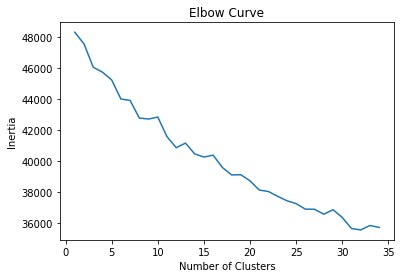

In [ ]:
kmeans_clusters = range(1, 35)
kmeans = [MiniBatchKMeans(n_clusters=i,verbose=0) for i in kmeans_clusters]
inertia = [kmeans[i].fit(tfidf_vector).inertia_ for i in range(len(kmeans))]
plt.plot(kmeans_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans_model = MiniBatchKMeans(n_clusters=30)
kmeans_model.fit(tfidf_vector)
train_preds = kmeans_model.predict(tfidf_vector)
ques['tf_preds_label'] = train_preds

In [ ]:
prediction_label = ques.iloc[new_document_idx,]['tf_preds_label']
pd.DataFrame(data = {'questions_title': new_document['questions_title'], 'questions_body': new_document['questions_body'], 'question_tag_name':new_document['question_tag_name'],'tf_preds_label':prediction_label }, index = range(1)).T


,0
questions_title,copi editor content editor
questions_body,rather one wonder awar type editor differ skil...
question_tag_name,content edit publish content editor write edit...
tf_preds_label,26


In [ ]:
tf_df = ques.loc[((ques['tf_preds_label']==prediction_label)),['question_tag_name','questions_body']].sample(5)
tf_df

,question_tag_name,questions_body
24484,resum write job applic,attend summer school train colleg write second...
48478,public relat write,public relat import student write well want wr...
36075,write first job creativ write,high school student want becom writer plan tak...
30612,write creativ product,know creativ peopl tend struggl procrastin hab...
51081,literatur creativ write author,hi aspir writer take colleg cours write class ...


In [ ]:
tf_recommendation = ques.loc[tf_df.index,['question_tag_name','questions_body','answer_body']]
tf_recommendation

,question_tag_name,questions_body,answer_body
24484,resum write job applic,attend summer school train colleg write second...,If the training or education is directly relat...
48478,public relat write,public relat import student write well want wr...,Say more with less. I've noticed that many col...
36075,write first job creativ write,high school student want becom writer plan tak...,Good tips from Daniela above. I would also sug...
30612,write creativ product,know creativ peopl tend struggl procrastin hab...,It's important to learn how to manage your tim...
51081,literatur creativ write author,hi aspir writer take colleg cours write class ...,College is an excellent place to sharpen your ...


## Doc2Vec
* Run evaluation function to  which combination of parameters has the best performance:
    * Model Complexity (simpler the better)
    * Evaluation score
* Use the best evaluated model to build reccomender system:
    * Use cosine similarity: model's inherent attribute: model.docvecs.most_similar
    * Use KMeans clustering

### Find the optimal combination of parameters using Grid Search:

In [ ]:
# Parameter grid search
#dm
#If 1, PV-DM is used. 
#if 0, PV-DBOW is employed.

#hs
# if 1, hierarchical softmax will be used for model training;
# if 0, and negative is non-zero, negative sampling will be used.

dm = [1, 0]
vector_size = [10, 50, 100]
window = [1,3]
hs = [1, 0]

paramsList = [{'dm': item[0],
               'vector_size': item[1],
               'window': item[2],
               'hs': item[3]} for item in
                 list(itertools.product(*[dm,
                                          vector_size,
                                          window,
                                          hs]))]

In [ ]:
def prepare_tag_doccument(df,tag, var):
    doc = []
    for v in var:
        var_tag_df = df[[v, tag]].drop_duplicates()
      #cells represents two cells corresponds to two var
        if v != tag:
            for row_idx, cells in var_tag_df.iterrows():
              #words (a list of unicode string tokens) and tags (a list of tokens).
              doc.append(TaggedDocument(words = cells[v].split(), tags = [cells[tag]]))
        else:
            for t in df[tag].drop_duplicates():
                doc.append(TaggedDocument(words = t.split(), tags = [t]))
    
    #shuffle documents in doc
    doc = shuffle(doc)
    return doc

In [ ]:
# tag on answer_id to recommend answer when new questions comes in
doc = prepare_tag_doccument(ques,'answers_id',columns)

In [ ]:
def evaluation_doc2vec(df,prepared_doc,params,tag,top=10):
    
    scoreList = []
    for param in params:
        param['score'] = 0
        model = None
        model = Doc2Vec(prepared_doc,
                        dm=param['dm'], 
                        vector_size=param['vector_size'], 
                        window=param['window'], 
                        min_count=1, 
                        epochs=10, 
                        hs=param['hs'])
        
        for row_idx, cells in df.iterrows():
            new_doc = cells['questions_title'] + cells['questions_body'] + cells['question_tag_name'] + cells['students_tag_name']
            test_doc_vector = model.infer_vector(new_doc.split())
            sims=model.docvecs.most_similar(positive=[test_doc_vector])
            topSims = sims[:10]
            for i in range(len(topSims)):
                idx = topSims[i][0]
                if cells[tag] == idx:
                    param['score'] = param['score'] + (top - i)
        print(param)
        print(param['score'])
        scoreList.append(param)
    return scoreList

subset = ques.sample(n = 50)
score_doc2vec = evaluation_doc2vec(subset, doc, paramsList, tag = 'answers_id')
score_doc2vec = pd.DataFrame(score_doc2vec)
score_doc2vec = score_doc2vec.sort_values(by=['score'],
                                          ascending=False)
print(score_doc2vec.head(15))

{'dm': 1, 'vector_size': 10, 'window': 1, 'hs': 1, 'score': 289}
289
{'dm': 1, 'vector_size': 10, 'window': 1, 'hs': 0, 'score': 177}
177
{'dm': 1, 'vector_size': 10, 'window': 3, 'hs': 1, 'score': 290}
290
{'dm': 1, 'vector_size': 10, 'window': 3, 'hs': 0, 'score': 90}
90
{'dm': 1, 'vector_size': 50, 'window': 1, 'hs': 1, 'score': 444}
444
{'dm': 1, 'vector_size': 50, 'window': 1, 'hs': 0, 'score': 391}
391
{'dm': 1, 'vector_size': 50, 'window': 3, 'hs': 1, 'score': 427}
427
{'dm': 1, 'vector_size': 50, 'window': 3, 'hs': 0, 'score': 325}
325
{'dm': 1, 'vector_size': 100, 'window': 1, 'hs': 1, 'score': 447}
447
{'dm': 1, 'vector_size': 100, 'window': 1, 'hs': 0, 'score': 385}
385
{'dm': 1, 'vector_size': 100, 'window': 3, 'hs': 1, 'score': 433}
433
{'dm': 1, 'vector_size': 100, 'window': 3, 'hs': 0, 'score': 347}
347
{'dm': 0, 'vector_size': 10, 'window': 1, 'hs': 1, 'score': 352}
352
{'dm': 0, 'vector_size': 10, 'window': 1, 'hs': 0, 'score': 321}
321
{'dm': 0, 'vector_size': 10, 'wi

### Use the best-evaluated/most simple D2V model
  * {'dm': 1, 'vector_size': 50, 'window': 1, 'hs': 1, 'score': 444}

In [ ]:
#Doc2Vec
def train_d2v(prepare_doc, dm, vector_size, window, hs, epoch_num):
    
    # build and train model
    model = Doc2Vec(dm = dm, vector_size= vector_size, hs = hs, window = window, epochs=epoch_num, workers = 4, seed = 0)
    model.build_vocab(prepare_doc)
    model.train(prepare_doc, total_examples=model.corpus_count, epochs=model.epochs) 

    # create embedding vector dictionary
    embed_dict = dict()
    for i in range(len(model.docvecs.index2entity)):
        embed_dict[model.docvecs.index2entity[i]] = model.docvecs.vectors_docs[i]

    return model,embed_dict

In [ ]:
# dm, vector_size, window, hs, epoch_num = 1,50,1,1,10
# d2v_ques_model, d2v_ques_vector = train_d2v(doc, dm, vector_size, window, hs, epoch_num)

# d2v_ques_model.save("d2v.model")
# print("Model Saved")

d2v_ques_model = Doc2Vec.load("d2v.model")

* {'dm': 0, 'vector_size': 50, 'window': 1, 'hs': 1, 'score': 431}

In [ ]:
# dm, vector_size, window, hs, epoch_num = 0,50,1,1,10
# d2v_ques_model_1, d2v_ques_vector_1 = train_d2v(doc, dm, vector_size, window, hs, epoch_num)

# d2v_ques_model_1.save("d2v_1.model")
# print("Model Saved")

d2v_ques_model_1 = Doc2Vec.load("d2v_1.model")

### Doc2Vec Recommender:
* Similarity Metrics: Cosine similairy

In [ ]:
def d2v_recommender(df, d2v_model, document):
    
    #new_doc = document['questions_title'] + document['questions_body'] + document['question_tag_name'] + document['students_tag_name']
    
    new_vector = d2v_model.infer_vector(new_doc.split())

    top10 = d2v_model.docvecs.most_similar([new_vector])
        
    
    df_ = pd.DataFrame(index=range(10), columns=df.columns)
    
    i = 0
    for ans_id, sim_score in top10:
        top = df[df['answers_id'] == ans_id]
        if i == 0:
            df_ = top
        else:
            df_ = pd.concat([df_,top])
        i += 1
           
    return df_

In [ ]:
match_df = d2v_recommender(ques,d2v_ques_model,new_doc)
match_df

,index,questions_id,questions_title,questions_body,question_score,question_tag_name,students_id,students_tag_name,questions_date_added_year,questions_date_added_month,...,answer_score,professionals_id,professionals_industry,professionals_headline,professional_tag_name,professionals_date_joined_year,professionals_date_joined_month,professionals_date_joined_day,kmeans_labels,tf_preds_label
42022,42792,f94b6c5eba1b4ad79c462dd78c59b5c0,copi editor content editor,rather one wonder awar type editor differ skil...,98.0,content edit publish content editor write edit...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,2,...,0.0,593b603af19e4a0eacccdea430eb204c,law practic,attorney,law-practice pub publishing,2017.0,1.0,19.0,2,26
42020,42790,f94b6c5eba1b4ad79c462dd78c59b5c0,copi editor content editor,rather one wonder awar type editor differ skil...,98.0,content edit publish content editor write edit...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,2,...,1.0,246a16223bb84519b646888c8b1b8435,write edit,profession editor writer,writing-and-editing,2018.0,8.0,2.0,20,26
42018,42788,f94b6c5eba1b4ad79c462dd78c59b5c0,copi editor content editor,rather one wonder awar type editor differ skil...,98.0,content edit publish content editor write edit...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,2,...,1.0,4269d6f3d21741b186048455bd513b0c,publish,write edit profession,publishing freelance-writing social-media-mark...,2017.0,12.0,14.0,21,26
42019,42789,f94b6c5eba1b4ad79c462dd78c59b5c0,copi editor content editor,rather one wonder awar type editor differ skil...,98.0,content edit publish content editor write edit...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,2,...,1.0,48116a8d267146dfa29d9fdd468b874d,publish,award win freelanc editor content strategist,editing editor writing-and-editing,2018.0,3.0,15.0,21,26
42023,42793,f94b6c5eba1b4ad79c462dd78c59b5c0,copi editor content editor,rather one wonder awar type editor differ skil...,98.0,content edit publish content editor write edit...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,2,...,0.0,48116a8d267146dfa29d9fdd468b874d,publish,award win freelanc editor content strategist,editing editor writing-and-editing,2018.0,3.0,15.0,23,26
42021,42791,f94b6c5eba1b4ad79c462dd78c59b5c0,copi editor content editor,rather one wonder awar type editor differ skil...,98.0,content edit publish content editor write edit...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,2,...,0.0,8c5ea269b4dc4b60832832a3755ecfff,e learn write,contribut writer vape magazin,e-learning writing writing-and-editing,2017.0,2.0,28.0,19,26
6484,6649,f979162af52c4826ab66b38dbbd4527d,get internship publish compani,colleg yet might littl earli ask realli like c...,3.0,internship publish write editor book internshi...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,1,...,7.0,a6d33c38902546849c36ea7e9e9f0870,career counsel,,none,2018.0,1.0,31.0,23,26
6486,6651,f979162af52c4826ab66b38dbbd4527d,get internship publish compani,colleg yet might littl earli ask realli like c...,3.0,internship publish write editor book internshi...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,1,...,5.0,a6d33c38902546849c36ea7e9e9f0870,career counsel,,none,2018.0,1.0,31.0,25,26
6481,6646,f979162af52c4826ab66b38dbbd4527d,get internship publish compani,colleg yet might littl earli ask realli like c...,3.0,internship publish write editor book internshi...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,1,...,11.0,a6d33c38902546849c36ea7e9e9f0870,career counsel,,none,2018.0,1.0,31.0,25,26
6482,6647,f979162af52c4826ab66b38dbbd4527d,get internship publish compani,colleg yet might littl earli ask realli like c...,3.0,i

In [ ]:
display(pd.DataFrame(data = {'questions_title': new_document['questions_title'], 'questions_body': new_document['questions_body'], 'question_tag_name':new_document['question_tag_name']}, index = range(1)).T)
match_df.loc[:,['question_tag_name','questions_body','answer_body']]

,0
questions_title,copi editor content editor
questions_body,rather one wonder awar type editor differ skil...
question_tag_name,content edit publish content editor write edit...


,question_tag_name,questions_body,answer_body
42022,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...,"I believe the short answer is yes. Often, deve..."
42020,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...,Absolutely. I'm a copy editor and an author of...
42018,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...,"Hi, Catherine. Yes, you can pursue both—sweete..."
42019,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...,"Yes, you can be both. I've been a developmenta..."
42023,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...,"Yes, you can be both. I've been a developmenta..."
42021,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...,I don't see a problem of being both. I'm a co...
6484,internship publish write editor book internshi...,colleg yet might littl earli ask realli like c...,"Hey Catherine, found another one! This is on L..."
6486,internship publish write editor book internshi...,colleg yet might littl earli ask realli like c...,"Hey Catherine, try this link for internships i..."
6481,internship publish write editor book internshi...,colleg yet might littl earli ask realli like c...,"Hey Catherine -- in doing some more research, ..."
6482,internship publish write editor book internshi...,colleg yet might littl earli ask realli like c...,"Hi Catherine, you've chosen a wonderful career..."


In [ ]:
d2v_answer = match_df[match_df['questions_id'] != ques.loc[new_document_idx]['questions_id']].loc[:,['questions_id','answer_body']]
d2v_answer

,questions_id,answer_body
6484,f979162af52c4826ab66b38dbbd4527d,"Hey Catherine, found another one! This is on L..."
6486,f979162af52c4826ab66b38dbbd4527d,"Hey Catherine, try this link for internships i..."
6481,f979162af52c4826ab66b38dbbd4527d,"Hey Catherine -- in doing some more research, ..."
6482,f979162af52c4826ab66b38dbbd4527d,"Hi Catherine, you've chosen a wonderful career..."


#### Similarity Metrics: KMeans Clustering

/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0

/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0

/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0

/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0

/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0

/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0

/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aliciazhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0

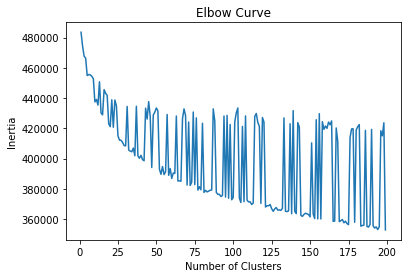

In [ ]:
kmeans_clusters = range(1, 200)
kmeans = [MiniBatchKMeans(n_clusters=i,verbose=0) for i in kmeans_clusters]
inertia = [kmeans[i].fit(d2v_ques_model.docvecs.doctag_syn0).inertia_ for i in range(len(kmeans))]
plt.plot(kmeans_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

## LDA

* n_components: Number of Topics (K)
* Dirichlet hyperparameter alpha: Document-Topic Density
* Dirichlet hyperparameter beta: Word-Topic Density

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(ques_related_feature)

In [ ]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'doc_topic_prior': [0.05,0.1,0.5,1], 'topic_word_prior': [0.05,0.1,0.5,1]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params, verbose = 10)

# Do the Grid Search
model.fit(data_vectorized)

# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] doc_topic_prior=0.05, n_components=10, topic_word_prior=0.05 ....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  doc_topic_prior=0.05, n_components=10, topic_word_prior=0.05, score=-2233369.502, total= 2.7min
[CV] doc_topic_prior=0.05, n_components=10, topic_word_prior=0.05 ....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[CV]  doc_topic_prior=0.05, n_components=10, topic_word_prior=0.05, score=-2115864.577, total= 2.6min
[CV] doc_topic_prior=0.05, n_components=10, topic_word_prior=0.05 ....


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.3min remaining:    0.0s


[CV]  doc_topic_prior=0.05, n_components=10, topic_word_prior=0.05, score=-2068361.983, total= 2.8min
[CV] doc_topic_prior=0.05, n_components=10, topic_word_prior=0.05 ....


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  8.1min remaining:    0.0s


[CV]  doc_topic_prior=0.05, n_components=10, topic_word_prior=0.05, score=-1871025.120, total=12.1min
[CV] doc_topic_prior=0.05, n_components=10, topic_word_prior=0.05 ....


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 20.2min remaining:    0.0s


[CV]  doc_topic_prior=0.05, n_components=10, topic_word_prior=0.05, score=-2146301.302, total=87.4min
[CV] doc_topic_prior=0.05, n_components=10, topic_word_prior=0.1 .....


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 107.6min remaining:    0.0s


[CV]  doc_topic_prior=0.05, n_components=10, topic_word_prior=0.1, score=-2235178.352, total=363.5min
[CV] doc_topic_prior=0.05, n_components=10, topic_word_prior=0.1 .....


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 471.1min remaining:    0.0s


[CV]  doc_topic_prior=0.05, n_components=10, topic_word_prior=0.1, score=-2122027.373, total= 2.8min
[CV] doc_topic_prior=0.05, n_components=10, topic_word_prior=0.1 .....


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 473.8min remaining:    0.0s


[CV]  doc_topic_prior=0.05, n_components=10, topic_word_prior=0.1, score=-2049799.629, total= 2.6min
[CV] doc_topic_prior=0.05, n_components=10, topic_word_prior=0.1 .....


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 476.5min remaining:    0.0s


[CV]  doc_topic_prior=0.05, n_components=10, topic_word_prior=0.1, score=-1870946.619, total= 2.8min
[CV] doc_topic_prior=0.05, n_components=10, topic_word_prior=0.1 .....


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 479.3min remaining:    0.0s


[CV]  doc_topic_prior=0.05, n_components=10, topic_word_prior=0.1, score=-2135793.662, total=65.5min
[CV] doc_topic_prior=0.05, n_components=10, topic_word_prior=0.5 .....
[CV]  doc_topic_prior=0.05, n_components=10, topic_word_prior=0.5, score=-2250226.432, total= 2.6min
[CV] doc_topic_prior=0.05, n_components=10, topic_word_prior=0.5 .....
[CV]  doc_topic_prior=0.05, n_components=10, topic_word_prior=0.5, score=-2133502.914, total= 2.6min
[CV] doc_topic_prior=0.05, n_components=10, topic_word_prior=0.5 .....
[CV]  doc_topic_prior=0.05, n_components=10, topic_word_prior=0.5, score=-2069190.491, total= 2.6min
[CV] doc_topic_prior=0.05, n_components=10, topic_word_prior=0.5 .....
[CV]  doc_topic_prior=0.05, n_components=10, topic_word_prior=0.5, score=-1873828.228, total= 2.6min
[CV] doc_topic_prior=0.05, n_components=10, topic_word_prior=0.5 .....
[CV]  doc_topic_prior=0.05, n_components=10, topic_word_prior=0.5, score=-2148883.532, total=60.5min
[CV] doc_topic_prior=0.05, n_components

[CV]  doc_topic_prior=0.05, n_components=20, topic_word_prior=1, score=-2133292.114, total=10.5min
[CV] doc_topic_prior=0.05, n_components=20, topic_word_prior=1 .......
[CV]  doc_topic_prior=0.05, n_components=20, topic_word_prior=1, score=-1946015.162, total= 3.3min
[CV] doc_topic_prior=0.05, n_components=20, topic_word_prior=1 .......
[CV]  doc_topic_prior=0.05, n_components=20, topic_word_prior=1, score=-2213692.767, total= 4.4min
[CV] doc_topic_prior=0.05, n_components=25, topic_word_prior=0.05 ....
[CV]  doc_topic_prior=0.05, n_components=25, topic_word_prior=0.05, score=-2216750.140, total= 2.9min
[CV] doc_topic_prior=0.05, n_components=25, topic_word_prior=0.05 ....
[CV]  doc_topic_prior=0.05, n_components=25, topic_word_prior=0.05, score=-2100278.983, total= 3.4min
[CV] doc_topic_prior=0.05, n_components=25, topic_word_prior=0.05 ....
[CV]  doc_topic_prior=0.05, n_components=25, topic_word_prior=0.05, score=-2040276.189, total= 2.8min
[CV] doc_topic_prior=0.05, n_components=25

[CV]  doc_topic_prior=0.1, n_components=10, topic_word_prior=0.1, score=-2243481.397, total= 3.9min
[CV] doc_topic_prior=0.1, n_components=10, topic_word_prior=0.1 ......
[CV]  doc_topic_prior=0.1, n_components=10, topic_word_prior=0.1, score=-2116794.392, total= 3.3min
[CV] doc_topic_prior=0.1, n_components=10, topic_word_prior=0.1 ......
[CV]  doc_topic_prior=0.1, n_components=10, topic_word_prior=0.1, score=-2047390.516, total= 3.4min
[CV] doc_topic_prior=0.1, n_components=10, topic_word_prior=0.1 ......
[CV]  doc_topic_prior=0.1, n_components=10, topic_word_prior=0.1, score=-1865211.354, total= 4.3min
[CV] doc_topic_prior=0.1, n_components=10, topic_word_prior=0.1 ......
[CV]  doc_topic_prior=0.1, n_components=10, topic_word_prior=0.1, score=-2127249.542, total= 3.4min
[CV] doc_topic_prior=0.1, n_components=10, topic_word_prior=0.5 ......
[CV]  doc_topic_prior=0.1, n_components=10, topic_word_prior=0.5, score=-2243341.974, total= 3.5min
[CV] doc_topic_prior=0.1, n_components=10, to

[CV]  doc_topic_prior=0.1, n_components=20, topic_word_prior=0.5, score=-1897235.819, total= 3.5min
[CV] doc_topic_prior=0.1, n_components=20, topic_word_prior=0.5 ......
[CV]  doc_topic_prior=0.1, n_components=20, topic_word_prior=0.5, score=-2168929.826, total= 3.5min
[CV] doc_topic_prior=0.1, n_components=20, topic_word_prior=1 ........
[CV]  doc_topic_prior=0.1, n_components=20, topic_word_prior=1, score=-2315961.359, total= 2.8min
[CV] doc_topic_prior=0.1, n_components=20, topic_word_prior=1 ........
[CV]  doc_topic_prior=0.1, n_components=20, topic_word_prior=1, score=-2199854.533, total= 3.2min
[CV] doc_topic_prior=0.1, n_components=20, topic_word_prior=1 ........
[CV]  doc_topic_prior=0.1, n_components=20, topic_word_prior=1, score=-2141491.762, total= 3.3min
[CV] doc_topic_prior=0.1, n_components=20, topic_word_prior=1 ........
[CV]  doc_topic_prior=0.1, n_components=20, topic_word_prior=1, score=-1950360.578, total= 2.8min
[CV] doc_topic_prior=0.1, n_components=20, topic_word

[CV]  doc_topic_prior=0.5, n_components=10, topic_word_prior=0.05, score=-2068814.929, total= 5.5min
[CV] doc_topic_prior=0.5, n_components=10, topic_word_prior=0.05 .....
[CV]  doc_topic_prior=0.5, n_components=10, topic_word_prior=0.05, score=-1876866.524, total= 4.2min
[CV] doc_topic_prior=0.5, n_components=10, topic_word_prior=0.05 .....
[CV]  doc_topic_prior=0.5, n_components=10, topic_word_prior=0.05, score=-2144002.580, total= 5.1min
[CV] doc_topic_prior=0.5, n_components=10, topic_word_prior=0.1 ......
[CV]  doc_topic_prior=0.5, n_components=10, topic_word_prior=0.1, score=-2244960.924, total= 4.6min
[CV] doc_topic_prior=0.5, n_components=10, topic_word_prior=0.1 ......
[CV]  doc_topic_prior=0.5, n_components=10, topic_word_prior=0.1, score=-2126403.176, total= 3.6min
[CV] doc_topic_prior=0.5, n_components=10, topic_word_prior=0.1 ......
[CV]  doc_topic_prior=0.5, n_components=10, topic_word_prior=0.1, score=-2060884.699, total= 4.0min
[CV] doc_topic_prior=0.5, n_components=10,

[CV]  doc_topic_prior=0.5, n_components=20, topic_word_prior=0.5, score=-2302925.647, total= 3.2min
[CV] doc_topic_prior=0.5, n_components=20, topic_word_prior=0.5 ......
[CV]  doc_topic_prior=0.5, n_components=20, topic_word_prior=0.5, score=-2188099.303, total= 3.1min
[CV] doc_topic_prior=0.5, n_components=20, topic_word_prior=0.5 ......
[CV]  doc_topic_prior=0.5, n_components=20, topic_word_prior=0.5, score=-2139415.549, total= 3.2min
[CV] doc_topic_prior=0.5, n_components=20, topic_word_prior=0.5 ......
[CV]  doc_topic_prior=0.5, n_components=20, topic_word_prior=0.5, score=-1946151.873, total= 3.3min
[CV] doc_topic_prior=0.5, n_components=20, topic_word_prior=0.5 ......
[CV]  doc_topic_prior=0.5, n_components=20, topic_word_prior=0.5, score=-2205841.637, total= 3.3min
[CV] doc_topic_prior=0.5, n_components=20, topic_word_prior=1 ........
[CV]  doc_topic_prior=0.5, n_components=20, topic_word_prior=1, score=-2357454.147, total= 3.5min
[CV] doc_topic_prior=0.5, n_components=20, topi

[CV]  doc_topic_prior=0.5, n_components=30, topic_word_prior=1, score=-2331127.170, total= 3.1min
[CV] doc_topic_prior=1, n_components=10, topic_word_prior=0.05 .......
[CV]  doc_topic_prior=1, n_components=10, topic_word_prior=0.05, score=-2262764.284, total= 2.5min
[CV] doc_topic_prior=1, n_components=10, topic_word_prior=0.05 .......
[CV]  doc_topic_prior=1, n_components=10, topic_word_prior=0.05, score=-2140877.202, total= 2.5min
[CV] doc_topic_prior=1, n_components=10, topic_word_prior=0.05 .......
[CV]  doc_topic_prior=1, n_components=10, topic_word_prior=0.05, score=-2084565.687, total= 2.5min
[CV] doc_topic_prior=1, n_components=10, topic_word_prior=0.05 .......
[CV]  doc_topic_prior=1, n_components=10, topic_word_prior=0.05, score=-1898078.064, total= 2.6min
[CV] doc_topic_prior=1, n_components=10, topic_word_prior=0.05 .......
[CV]  doc_topic_prior=1, n_components=10, topic_word_prior=0.05, score=-2167292.146, total= 2.5min
[CV] doc_topic_prior=1, n_components=10, topic_word_

[CV]  doc_topic_prior=1, n_components=20, topic_word_prior=0.1, score=-1910124.960, total= 2.1min
[CV] doc_topic_prior=1, n_components=20, topic_word_prior=0.1 ........
[CV]  doc_topic_prior=1, n_components=20, topic_word_prior=0.1, score=-2192761.335, total= 2.4min
[CV] doc_topic_prior=1, n_components=20, topic_word_prior=0.5 ........
[CV]  doc_topic_prior=1, n_components=20, topic_word_prior=0.5, score=-2329012.187, total= 2.0min
[CV] doc_topic_prior=1, n_components=20, topic_word_prior=0.5 ........
[CV]  doc_topic_prior=1, n_components=20, topic_word_prior=0.5, score=-2211233.724, total= 2.2min
[CV] doc_topic_prior=1, n_components=20, topic_word_prior=0.5 ........
[CV]  doc_topic_prior=1, n_components=20, topic_word_prior=0.5, score=-2153188.851, total= 2.0min
[CV] doc_topic_prior=1, n_components=20, topic_word_prior=0.5 ........
[CV]  doc_topic_prior=1, n_components=20, topic_word_prior=0.5, score=-1972291.526, total= 2.0min
[CV] doc_topic_prior=1, n_components=20, topic_word_prior

[CV]  doc_topic_prior=1, n_components=30, topic_word_prior=1, score=-2279696.154, total= 2.0min
[CV] doc_topic_prior=1, n_components=30, topic_word_prior=1 ..........
[CV]  doc_topic_prior=1, n_components=30, topic_word_prior=1, score=-2092041.438, total= 2.1min
[CV] doc_topic_prior=1, n_components=30, topic_word_prior=1 ..........
[CV]  doc_topic_prior=1, n_components=30, topic_word_prior=1, score=-2357458.488, total= 1.8min


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 4231.4min finished


Best Model's Params:  {'doc_topic_prior': 0.05, 'n_components': 25, 'topic_word_prior': 0.05}
Best Log Likelihood Score:  -2062711.7954533151
Model Perplexity:  341.6992895267135


In [ ]:
def train_lda(n_topics,alpha,beta):
    
    lda = LatentDirichletAllocation(n_components = n_topics, doc_topic_prior = alpha, topic_word_prior = beta)
    lda.fit_transform(data_vectorized)

    return lda

In [ ]:
n_topics,alpha, beta = 25, 0.05, 0.05
lda_model = train_lda(n_topics = n_topics,alpha = alpha,beta = beta)

In [ ]:
import pickle
#pickle.dump(lda_model, open('lda_model.pk', 'wb')) 
lda_model_1 = pickle.load(open('lda_model.pk', 'rb'))

EOFError: Ran out of input

In [ ]:
# Create Document — Topic Matrix
lda_output = lda_model.transform(data_vectorized)
# column names
topicnames = ['Topic' + str(i) for i in range(n_topics)]
# index names
docnames = ['Doc' + str(i) for i in range(len(ques))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic.head(15)

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,...,Topic16,Topic17,Topic18,Topic19,Topic20,Topic21,Topic22,Topic23,Topic24,dominant_topic
Doc0,0.00,0.0,0.00,0.0,0.42,0.00,0.39,0.0,0.00,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4
Doc1,0.83,0.0,0.00,0.0,0.13,0.00,0.00,0.0,0.00,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0
Doc2,0.83,0.0,0.00,0.0,0.13,0.00,0.00,0.0,0.00,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0
Doc3,0.00,0.0,0.58,0.0,0.05,0.05,0.00,0.0,0.10,0.0,...,0.07,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,2
Doc4,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0.00,0.19,0.00,0.00,0.0,0.75,0.00,0.00,0.0,21
Doc5,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0.00,0.19,0.00,0.00,0.0,0.75,0.00,0.00,0.0,21
Doc6,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.53,0.0,23
Doc7,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.53,0.0,23
Doc8,0.66,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.23,0.00,0.0,0
Doc9,0.00,0.0,0.00,0.0,0.26,0.00,0.00,0.0,0.00,0.0,...,0.00,0.00,0.12,0.37,0.0,0.00,0.00,0.00,0.0,19


In [ ]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(lda_model.components_)
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head()

,abandon,abil,abl,aboard,abraham,abroad,absenc,absolut,absorb,absurd,...,youth,youtub,yrs,yui,zero,zone,zoo,zookeep,zoolog,zoologist
Topic0,0.05,0.050000,22.454620,0.05,17.95041,0.050000,0.05,11.756999,0.05,0.05,...,0.050000,194.416979,3.456032,0.05,0.050000,0.05,0.05,0.050000,0.05,0.05
Topic1,0.05,0.050000,60.677106,0.05,0.05000,0.050000,0.05,14.270632,0.05,0.05,...,210.794289,0.050000,0.050000,0.05,0.050000,0.05,0.05,0.050000,0.05,0.05
Topic2,0.05,109.733519,161.802869,32.05,0.05000,0.050003,0.05,0.050000,0.05,0.05,...,0.050000,0.050000,0.050000,0.05,3.271944,0.05,0.05,0.050000,0.05,0.05
Topic3,0.05,3.745021,25.248629,0.05,0.05000,0.050000,0.05,14.116438,0.05,0.05,...,0.050000,1.116943,0.050000,0.05,0.050000,0.05,39.05,60.629857,240.05,83.05
Topic4,0.05,6.324302,79.949947,0.05,0.14959,0.050000,18.05,32.608754,0.05,0.05,...,0.050000,0.050000,0.096959,0.05,0.050000,0.05,0.05,0.050000,0.05,0.05


In [ ]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,dental,militari,becom,dentistri,want,dentist,forc,armi,train,join,hygienist,navi,studi,state,school
Topic 1,psycholog,human,clinic,counsel,resourc,mental,health,psychologist,question,work,social,child,peopl,neurosci,research
Topic 2,job,resum,interview,search,work,skill,employ,experi,applic,develop,person,career,look,hire,resourc
Topic 3,biolog,anim,environment,scienc,pilot,industri,aviat,veterinari,marin,airlin,want,veterinarian,theatr,wildlif,becom
Topic 4,educ,medicin,medic,doctor,teacher,teach,school,want,becom,health,pre,med,higher,hospit,high
Topic 5,career,path,choic,counsel,fashion,want,consult,know,educ,develop,advic,choos,pursu,futur,colleg
Topic 6,math,languag,career,mathemat,professor,student,academ,learn,advis,stress,counselor,foreign,class,construct,counsel
Topic 7,technolog,tech,inform,women,stem,chemistri,pharmaci,pharmacist,work,field,scienc,want,technician,organ,pharmaceut
Topic 8,design,art,game,graphic,artist,want,interior,act,profession,career,draw,like,know,web,becom
Topic 9,degre,graduat,school,master,bachelor,work,scienc,year,program,undergradu,plan,pursu,mba,student,colleg


In [ ]:
df_topic_keywords.iloc[[4,8,12],:]

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 4,educ,medicin,medic,doctor,teacher,teach,school,want,becom,health,pre,med,higher,hospit,high
Topic 8,design,art,game,graphic,artist,want,interior,act,profession,career,draw,like,know,web,becom
Topic 12,nurs,healthcar,pediatr,regist,care,medicin,hospit,health,medic,becom,pediatrician,want,neonat,practition,physician


In [ ]:
# Define function to predict topic for a given text document.
def predict_topic(text):
    
    text = vectorizer.transform(text)
    
    topic_probability_scores = lda_model.transform(text)
    
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), 1:14].values.tolist()
    
    infer_topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), -1]
    
    return infer_topic,topic_probability_scores

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

def similar_documents(text, doc_topic_probs, documents, top_n, verbose=False):
    topic, x  = predict_topic([text])
    dists = euclidean_distances(x.reshape(1, -1), doc_topic_probs)[0]
    doc_ids = np.argsort(dists)[:top_n]
    if verbose:
        print("Topic KeyWords: ", topic)
        print("Topic Prob Scores of text: ", np.round(x, 2))
        print("Most Similar Doc's Probs:  ", np.round(doc_topic_probs[doc_ids], 2))
    return doc_ids,np.take(doc_topic_probs,doc_ids)

doc_ids, docs = similar_documents(text=new_doc_ws, doc_topic_probs=lda_output, documents = ques, top_n=20, verbose=True)


Topic KeyWords:  editor
Topic Prob Scores of text:  [[0.   0.   0.   0.   0.   0.11 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.01 0.   0.   0.   0.87 0.   0.   0.   0.  ]]
Most Similar Doc's Probs:   [[0.   0.   0.   0.   0.   0.11 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.01 0.   0.   0.   0.87 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.11 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.01 0.   0.   0.   0.87 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.11 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.01 0.   0.   0.   0.87 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.11 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.01 0.   0.   0.   0.87 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.11 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.01 0.   0.   0.   0.87 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.11 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.01 0.   0.   0.   0.87 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0

In [ ]:
lda_df = ques.iloc[doc_ids,]
display(lda_df)
lda_answer = lda_df[lda_df['questions_id'] != ques.loc[new_document_idx]['questions_id']].loc[:,['questions_id','answer_body']]

,index,questions_id,questions_title,questions_body,question_score,question_tag_name,students_id,students_tag_name,questions_date_added_year,questions_date_added_month,...,answer_score,professionals_id,professionals_industry,professionals_headline,professional_tag_name,professionals_date_joined_year,professionals_date_joined_month,professionals_date_joined_day,kmeans_labels,tf_preds_label
42023,42793,f94b6c5eba1b4ad79c462dd78c59b5c0,copi editor content editor,rather one wonder awar type editor differ skil...,98.0,content edit publish content editor write edit...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,2,...,0.0,48116a8d267146dfa29d9fdd468b874d,publish,award win freelanc editor content strategist,editing editor writing-and-editing,2018.0,3.0,15.0,23,26
42021,42791,f94b6c5eba1b4ad79c462dd78c59b5c0,copi editor content editor,rather one wonder awar type editor differ skil...,98.0,content edit publish content editor write edit...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,2,...,0.0,8c5ea269b4dc4b60832832a3755ecfff,e learn write,contribut writer vape magazin,e-learning writing writing-and-editing,2017.0,2.0,28.0,19,26
42020,42790,f94b6c5eba1b4ad79c462dd78c59b5c0,copi editor content editor,rather one wonder awar type editor differ skil...,98.0,content edit publish content editor write edit...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,2,...,1.0,246a16223bb84519b646888c8b1b8435,write edit,profession editor writer,writing-and-editing,2018.0,8.0,2.0,20,26
42019,42789,f94b6c5eba1b4ad79c462dd78c59b5c0,copi editor content editor,rather one wonder awar type editor differ skil...,98.0,content edit publish content editor write edit...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,2,...,1.0,48116a8d267146dfa29d9fdd468b874d,publish,award win freelanc editor content strategist,editing editor writing-and-editing,2018.0,3.0,15.0,21,26
42018,42788,f94b6c5eba1b4ad79c462dd78c59b5c0,copi editor content editor,rather one wonder awar type editor differ skil...,98.0,content edit publish content editor write edit...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,2,...,1.0,4269d6f3d21741b186048455bd513b0c,publish,write edit profession,publishing freelance-writing social-media-mark...,2017.0,12.0,14.0,21,26
42022,42792,f94b6c5eba1b4ad79c462dd78c59b5c0,copi editor content editor,rather one wonder awar type editor differ skil...,98.0,content edit publish content editor write edit...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,2,...,0.0,593b603af19e4a0eacccdea430eb204c,law practic,attorney,law-practice pub publishing,2017.0,1.0,19.0,2,26
1670,1701,909f88301f744ff284ab0eb18edb2e47,day life editor like,dream career fiction author know realli financ...,2.0,publish author write editor book writer novel ...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,1,...,2.0,8c5ea269b4dc4b60832832a3755ecfff,e learn write,contribut writer vape magazin,e-learning writing writing-and-editing,2017.0,2.0,28.0,21,26
1671,1702,909f88301f744ff284ab0eb18edb2e47,day life editor like,dream career fiction author know realli financ...,2.0,publish author write editor book writer novel ...,e9e520a1e9d741819907586acbd3442d,career advic career english literatur editor c...,2018,1,...,1.0,c44a6a7eca4545c6b67cd5450758aaa5,market advertis editori content manag,editor market profession career coach,editing writing-and-editing media marketing-an...,2017.0,4.0,21.0,7,26
26789,27421,c463589a541a41d291c2a3fb4d8609d9,writer begin career,love write consid go creativ write know exact ...,2.0,english composit writer,4222a9f6bddc486eb5257f21473f480e,,2016,5,...,0.0,2620d79197da4d7d9feaaf9d435d64b3,write edit,graduat student social media outreach coordin ...,graduate-programs english-and-comparative-lite...,

In [ ]:
display(pd.DataFrame(data = {'questions_title': new_document['questions_title'], 'questions_body': new_document['questions_body'], 'question_tag_name':new_document['question_tag_name']}, index = range(1)).T)
lda_df.loc[:,['question_tag_name','questions_body','answer_body']]

,0
questions_title,copi editor content editor
questions_body,rather one wonder awar type editor differ skil...
question_tag_name,content edit publish content editor write edit...


,question_tag_name,questions_body,answer_body
42023,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...,"Yes, you can be both. I've been a developmenta..."
42021,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...,I don't see a problem of being both. I'm a co...
42020,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...,Absolutely. I'm a copy editor and an author of...
42019,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...,"Yes, you can be both. I've been a developmenta..."
42018,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...,"Hi, Catherine. Yes, you can pursue both—sweete..."


### Compare Recommenders

In [ ]:
new_document['questions_body']

In [ ]:
new_doc_df = pd.DataFrame(data = {'questions_title': new_document['questions_title'], 'questions_body': new_document['questions_body'], 'question_tag_name':new_document['question_tag_name']}, index = range(1)).T
new_doc_df.columns = ['Sample Question']
display(new_doc_df)
lda_rec = lda_df.loc[:,['question_tag_name','questions_body']].reset_index().iloc[:5,1:]
d2v_rec = match_df.loc[:,['question_tag_name','questions_body']].reset_index().iloc[:5,1:]
tf_rec = tf_df.loc[:,['question_tag_name','questions_body']].reset_index().iloc[:5,1:]
df_concat = pd.concat([lda_rec, d2v_rec,tf_rec], axis=1)
df_concat.columns = ['lda_question_tag','lda_question_body','d2v_question_tag','d2v_question_body','tf_question_tag','tf_question_body']
df_concat

,Sample Question
questions_title,copi editor content editor
questions_body,rather one wonder awar type editor differ skil...
question_tag_name,content edit publish content editor write edit...


,lda_question_tag,lda_question_body,d2v_question_tag,d2v_question_body,tf_question_tag,tf_question_body
0,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...
1,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...
2,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...
3,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...
4,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...,content edit publish content editor write edit...,rather one wonder awar type editor differ skil...


### All recommendation systems recommend the sample question itself -- confidence in our recommendations

In [ ]:
#The sample test question
whole_df.iloc[new_document_idx,:]['questions_body']

"Rather than being one or the other, I'm wondering if you can be both. I'm aware that each type of editor has a different skill set; however, I love the idea of doing both types of editing and I wouldn't want to limit myself to one type. Plus, wouldn't the flexibility of being able to do either type of editing be an advantage career-wise? \r\n#writing #editing #writing-and-editing #copy-editing #content-editing #copy-editor #content-editor #editor #novel #book #novels #books #publishing "

In [ ]:
orig_ques_dic = dict()
for model in [lda_answer,d2v_answer,tf_answer]:
    for i in model.iloc[:4,:].loc[:,'questions_id'].drop_duplicates():
        orig_ques = whole_df[whole_df['questions_id'] == i]['questions_body'].values
        if i not in orig_ques_dic.keys():
            orig_ques_dic[i] = orig_ques

In [ ]:
lda_rec = lda_df.loc[:,['answer_body']].reset_index().iloc[:5,1:]
d2v_rec = match_df.loc[:,['answer_body']].reset_index().iloc[:5,1:]
tf_rec = tf_df.loc[:,['answer_body']].reset_index().iloc[:5,1:]
df_concat = pd.concat([lda_rec, d2v_rec,tf_rec], axis=1)
df_concat.columns = ['lda_answer_body','d2v_answer_body','tf_answer_body']
df_concat

,lda_answer_body,d2v_answer_body,tf_answer_body
0,"Yes, you can be both. I've been a developmenta...","I believe the short answer is yes. Often, deve...","Yes, you can be both. I've been a developmenta..."
1,I don't see a problem of being both. I'm a co...,Absolutely. I'm a copy editor and an author of...,"Hi, Catherine. Yes, you can pursue both—sweete..."
2,Absolutely. I'm a copy editor and an author of...,"Hi, Catherine. Yes, you can pursue both—sweete...",Absolutely. I'm a copy editor and an author of...
3,"Yes, you can be both. I've been a developmenta...","Yes, you can be both. I've been a developmenta...",I don't see a problem of being both. I'm a co...
4,"Hi, Catherine. Yes, you can pursue both—sweete...","Yes, you can be both. I've been a developmenta...","I believe the short answer is yes. Often, deve..."


# Future Improvement
* Different similarity metrics
* Use Random grid search to replace GridSearchCV (resource/time-consuming)